In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'bio-t.csv')
df

,id,nome,inicio,fim,antepassado
0,1,A,16,14,NaN
1,2,B,15,11,1
2,3,C,14,13,1
3,4,D,14,11,1
4,5,E,13,10,3
5,6,F,13,12,3
6,7,G,12,7,[2 5]
7,8,H,13,0,3
8,9,I,7,3,7
9,10,J,5,2,9


In [2]:
dfr = pd.read_csv(r'bio-relate.csv')
dfr = dfr.dropna().reset_index(drop=True)
dfr

,D-ID,O-ID
0,2,1.0
1,3,1.0
2,4,1.0
3,5,3.0
4,6,3.0
5,7,2.0
6,7,5.0
7,8,3.0
8,9,7.0
9,10,9.0


In [3]:
def tree_ord(tree_list, origem_id, destino_id):
    tree_list_ord = tree_list            
    return tree_list_ord

def return_tree_data(df_especies, df_relations, ord_func):
    nome = df_especies['nome'].to_list()
    origem = df_especies['inicio'].to_list()
    extinção = df_especies['fim'].to_list()
    id_ = df_especies['id'].to_list()
    
    tree_especies_data = []
    for i in range(len(nome)):    
        tree_especies_data.append([nome[i], -origem[i], -extinção[i], i, id_[i]])
   
    O = df_relations['O-ID'].to_list()
    D = df_relations['D-ID'].to_list()
    
    tree_especies_data = ord_func(tree_especies_data, O, D)#ord
  
    x = []
    origem = []
    extinção = []
    nome = []
    id_ = []
    for i in range(len(tree_especies_data)):  
        nome.append(tree_especies_data[i][0])
        origem.append(tree_especies_data[i][1])
        extinção.append(tree_especies_data[i][2])
        x.append(i)
        id_.append(tree_especies_data[i][4])
#------------------------------------------------------------------------------------------------------
    x_o = []
    x_d = []
    y_l = []
    dy = []

    tree_r_data = []
    for i in range(len(O)):    
        tree_r_data.append([O[i], D[i]])
    for es in tree_r_data:

        ori = id_.index(es[0])
        des = id_.index(es[1])

        x_o.append(x[ori])
        x_d.append(x[des])

        dy.append(0)

        y_l.append(origem[des])
    
    return nome, origem, extinção, x, y_l, x_o, x_d, dy

In [4]:
nome, origem, extinção, x, y_l, x_o, x_d, dy = return_tree_data(df, dfr, tree_ord)

In [5]:
# [x1 , x2]
# [y1 , y2]
origem = np.array(origem)
extinção = np.array(extinção)
x = np.array(x)

y_values_l = [y_l, y_l]
x_values_l = [x_o, x_d]

x_o = np.array(x_o)
y_l = np.array(y_l)
x_d = np.array(x_d)

y_values_l = np.array(y_values_l)
x_values_l = np.array(x_values_l)
y_l2 = np.concatenate((y_l,y_l))

y_values = [origem, extinção]
x_values = [x,      x]

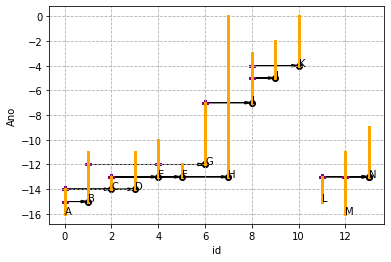

In [6]:
#printando com o algoritmo de antigo primeiro
for i in range(len(origem)):
    plt.annotate(str(nome[i]), (x[i], origem[i]))

plt.plot(x_values, y_values, linewidth = 3, color='orange')
#plt.plot(x_values_l, y_values_l)

colo = ['blue', 'orange', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black']

colo = colo + colo + colo + colo +colo +colo +colo +colo +colo 

for i in range(len(x_o)):
    plt.arrow(x_o[i], y_l2[i], x_d[i]-x_o[i], dy[i], length_includes_head=True, head_width=0.2, color='black')
    plt.scatter(x_o[i],y_l2[i], marker='P',color='purple')#saida
    plt.scatter(x_o[i]+x_d[i]-x_o[i], y_l2[i]+dy[i] , marker='o',color='black')#entrada

plt.xlabel("id")
plt.ylabel("Ano")
plt.grid(which='both', linestyle='--')
plt.show()